In [96]:
import pandas as pd 
# Basic Import
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [97]:
df=pd.read_csv('data.csv')

In [98]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [99]:
#dependent and dependent variable
x=df.drop(columns=['price'])

In [100]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [101]:
y=df.price

In [102]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [103]:
# Create Column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

In [104]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)



In [105]:
## Train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [106]:
x_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [107]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [108]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1011561.6136
- Mean Absolute Error: 756279.9536
- R2 Score: 0.7127
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1166147.5651
- Mean Absolute Error: 825127.5630
- R2 Score: 0.5911


Lasso
Model performance for Training set
- Root Mean Squared Error: 1011561.6136
- Mean Absolute Error: 756279.5269
- R2 Score: 0.7127
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1166148.0343
- Mean Absolute Error: 825127.7231
- R2 Score: 0.5911


Ridge
Model performance for Training set
- Root Mean Squared Error: 1011578.9806
- Mean Absolute Error: 756029.4830
- R2 Score: 0.7127
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1166363.2047
- Mean Absolute Error: 825249.6902
- R2 Score: 0.5909


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 919241.3737
-

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 412722.6645
- Mean Absolute Error: 293993.8605
- R2 Score: 0.9522
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1275088.7287
- Mean Absolute Error: 871874.9482
- R2 Score: 0.5111


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 81507.3790
- Mean Absolute Error: 46126.4872
- R2 Score: 0.9981
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1334555.5849
- Mean Absolute Error: 942253.0091
- R2 Score: 0.4644


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 359559.4083
- Mean Absolute Error: 275214.5854
- R2 Score: 0.9637
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1239501.3977
- Mean Absolute Error: 883467.0226
- R2 Score: 0.5380


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared

In [109]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.591067
1,Lasso,0.591067
2,Ridge,0.590916
7,CatBoosting Regressor,0.538003
3,K-Neighbors Regressor,0.520188
5,Random Forest Regressor,0.511094
8,AdaBoost Regressor,0.508410
6,XGBRegressor,0.464428
4,Decision Tree,0.064198


In [110]:

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 59.11


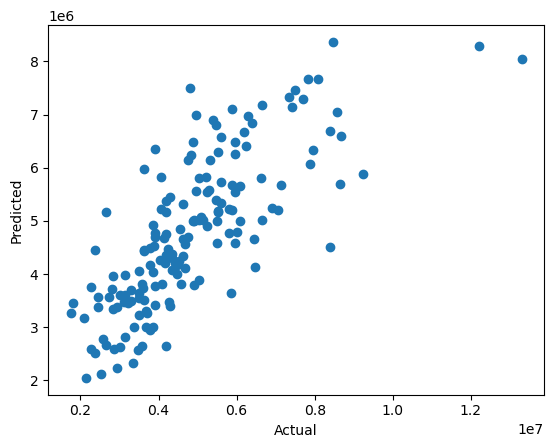

In [111]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

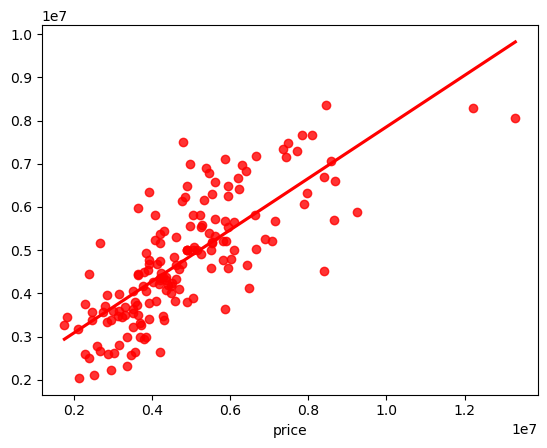

In [112]:

sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [113]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
351,3780000,2.936875e+06,8.431247e+05
235,4620000,5.308693e+06,-6.886932e+05
60,7140000,5.667146e+06,1.472854e+06
126,5880000,5.212400e+06,6.675999e+05
357,3773000,4.177166e+06,-4.041659e+05
...,...,...,...
334,3920000,3.774593e+06,1.454066e+05
35,8080940,7.661898e+06,4.190418e+05
112,6083000,4.994512e+06,1.088488e+06
304,4193000,5.381278e+06,-1.188278e+06
